In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

adult_data = pd.read_csv('../data/adult_data.csv')
adult_data


,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [22]:
# Remove rows with question marks in them.
adult_data = adult_data[adult_data.workclass != ' ?']
adult_data = adult_data[adult_data.occupation != ' ?']
adult_data = adult_data[adult_data.nativecountry != ' ?']

# Remove dot from incomes with a dot
adult_data.loc[adult_data['income'] == ' >50K.', 'income'] = ' >50K'
adult_data.loc[adult_data['income'] == ' <=50K.', 'income'] = ' <=50K'

# Income greater than 50K is 1
adult_data.loc[adult_data['income'] == ' >50K', 'income'] = 1

# Income less than 50K is 0
adult_data.loc[adult_data['income'] == ' <=50K', 'income'] = 0



# adult_data['education'] = adult_data.cc.cat.codes


In [23]:
# One-hot encode categorical columns
x = pd.get_dummies(data=adult_data,columns=['workclass','education','maritalstatus','occupation','relationship','race','nativecountry'])

In [31]:
display(x)

,age,fnlwgt,educationnum,sex,capitalgain,capitalloss,hoursperweek,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ Cambodia,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0

In [32]:

# # Remove dot from incomes with a dot
# x.loc[x['income'] == ' >50K.', 'income'] = ' >50K'
# x.loc[x['income'] == ' <=50K.', 'income'] = ' <=50K'

# # Income greater than 50K is 1
# x.loc[x['income'] == ' >50K', 'income'] = 1

# # Income less than 50K is 0
# x.loc[x['income'] == ' <=50K', 'income'] = 0

# Female is 1
x.loc[x['sex'] == ' Female', 'sex'] = 1

# Male is 0
x.loc[x['sex'] == ' Male', 'sex'] = 0


In [33]:
x

,age,fnlwgt,educationnum,sex,capitalgain,capitalloss,hoursperweek,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ Cambodia,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0

In [34]:
x.groupby('income').count()

,age,fnlwgt,educationnum,sex,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,nativecountry_ Cambodia,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014
1,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208


In [35]:
adult_data_export = np.array(x)
adult_data_export


array([[    39,  77516,     13, ...,      1,      0,      0],
       [    50,  83311,     13, ...,      1,      0,      0],
       [    38, 215646,      9, ...,      1,      0,      0],
       ...,
       [    38, 374983,     13, ...,      1,      0,      0],
       [    44,  83891,     13, ...,      1,      0,      0],
       [    35, 182148,     13, ...,      1,      0,      0]], dtype=int64)

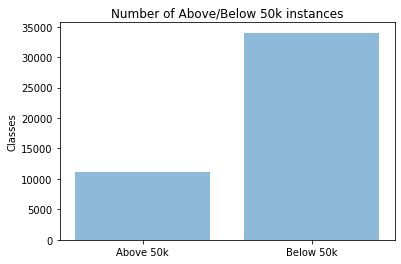

In [36]:
classes = ('Above 50k', 'Below 50k')
y_pos = np.arange(len(classes))
num_above = np.count_nonzero(adult_data_export[:,7]==1)
num_below = np.count_nonzero(adult_data_export[:,7]==0)
num = [num_above, num_below]

plt.bar(y_pos, num, align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Classes')
plt.title('Number of Above/Below 50k instances')

plt.show()

KeyboardInterrupt: 

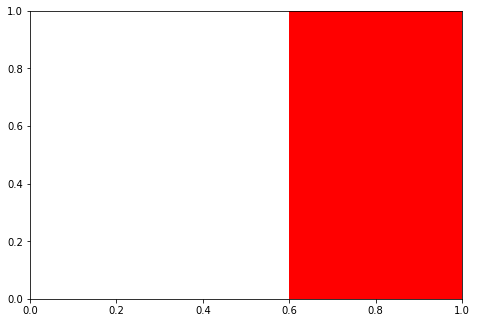

In [53]:
education_num = adult_data_export[:, 2] # educationnum 
income = adult_data_export[:, 0] # income
y_pos = np.arange(len(education_num))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(education_num, income, color='r')
# ax.scatter(x3, x4, color='g')
# ax.scatter(x5, x6, color='b')

ax.set_title('Education vs. Income')
ax.set_xlabel('Education')
ax.set_ylabel('Income')



In [51]:

education_num


array([13, 13,  9, ..., 13, 13, 13], dtype=int64)